In [3]:
import geopandas as gpd
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [10]:
df = pd.read_csv('../data/stations-with-coordinates.csv')
df.head()

,Name,Latitude,Longitude
0,Acton Town,51.502500,-0.278126
1,Acton Central,51.508835,-0.263033
2,Aldgate,51.513940,-0.075370
3,Aldgate East,51.515140,-0.071780
4,Alperton,51.540970,-0.300610


In [11]:
street_map = gpd.read_file('../statistical-gis-boundaries-london/ESRI/MSOA_2004_London_High_Resolution.shp')

In [14]:
crs = {'init':'espc:4326'}
geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]
# create GeoPandas dataframe
geo_df = gpd.GeoDataFrame(df,
 crs = crs,
 geometry = geometry)

/Users/biryani/anaconda3/lib/python3.11/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


CRSError: Invalid projection: +init=espc:4326 +type=crs: (Internal Proj Error: proj_create: cannot expand +init=espc:4326 +type=crs)

In [34]:
geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]

# Create GeoDataFrame with correct CRS
geo_df = gpd.GeoDataFrame(df, geometry=geometry)

# Set CRS to EPSG:4326 (WGS84)
geo_df.crs = "EPSG:4326"

# Print GeoDataFrame
print(geo_df)


/Users/biryani/anaconda3/lib/python3.11/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


CRSError: Invalid projection: +init=espc:4326 +type=crs: (Internal Proj Error: proj_create: cannot expand +init=espc:4326 +type=crs)

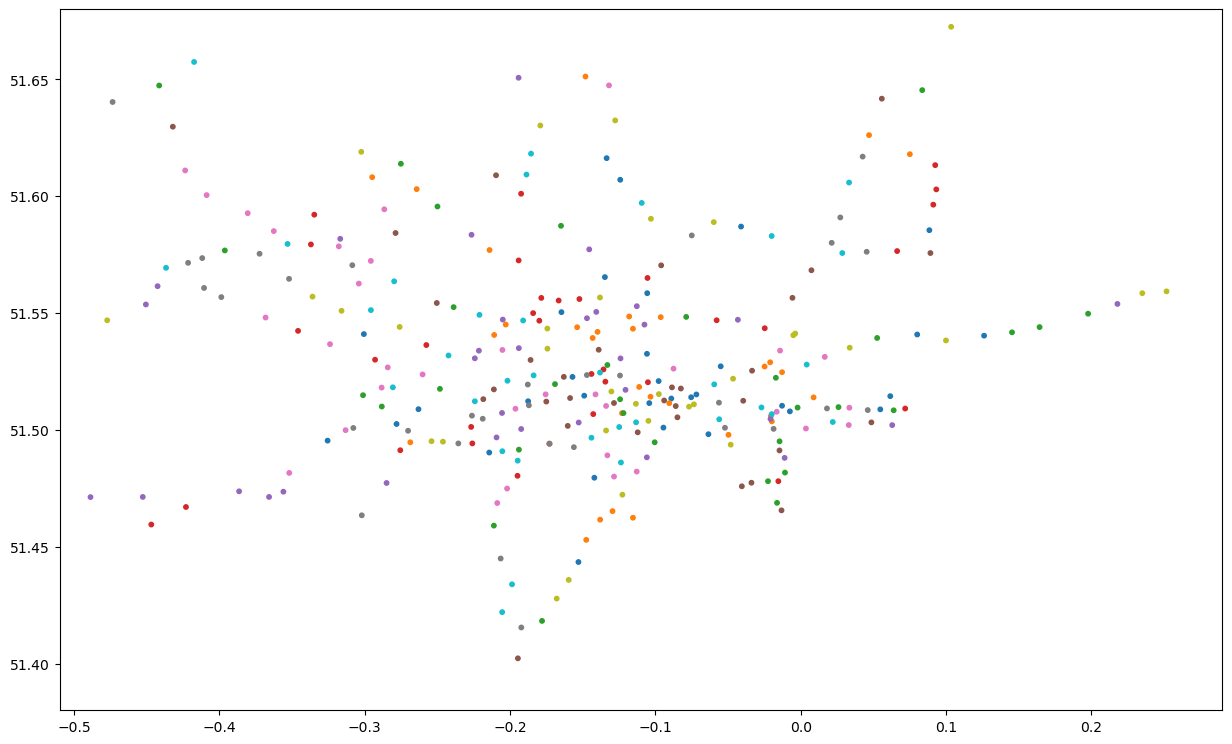

In [33]:
fig, ax = plt.subplots(figsize=(15,15))
street_map.plot(ax=ax, alpha=1,color='grey')
geo_df.plot(column="Name",ax=ax,alpha=1,markersize=10)
plt.xlim(-0.51, 0.29)
plt.ylim(51.38, 51.68)
plt.show()

ValueError: aspect must be finite and positive 

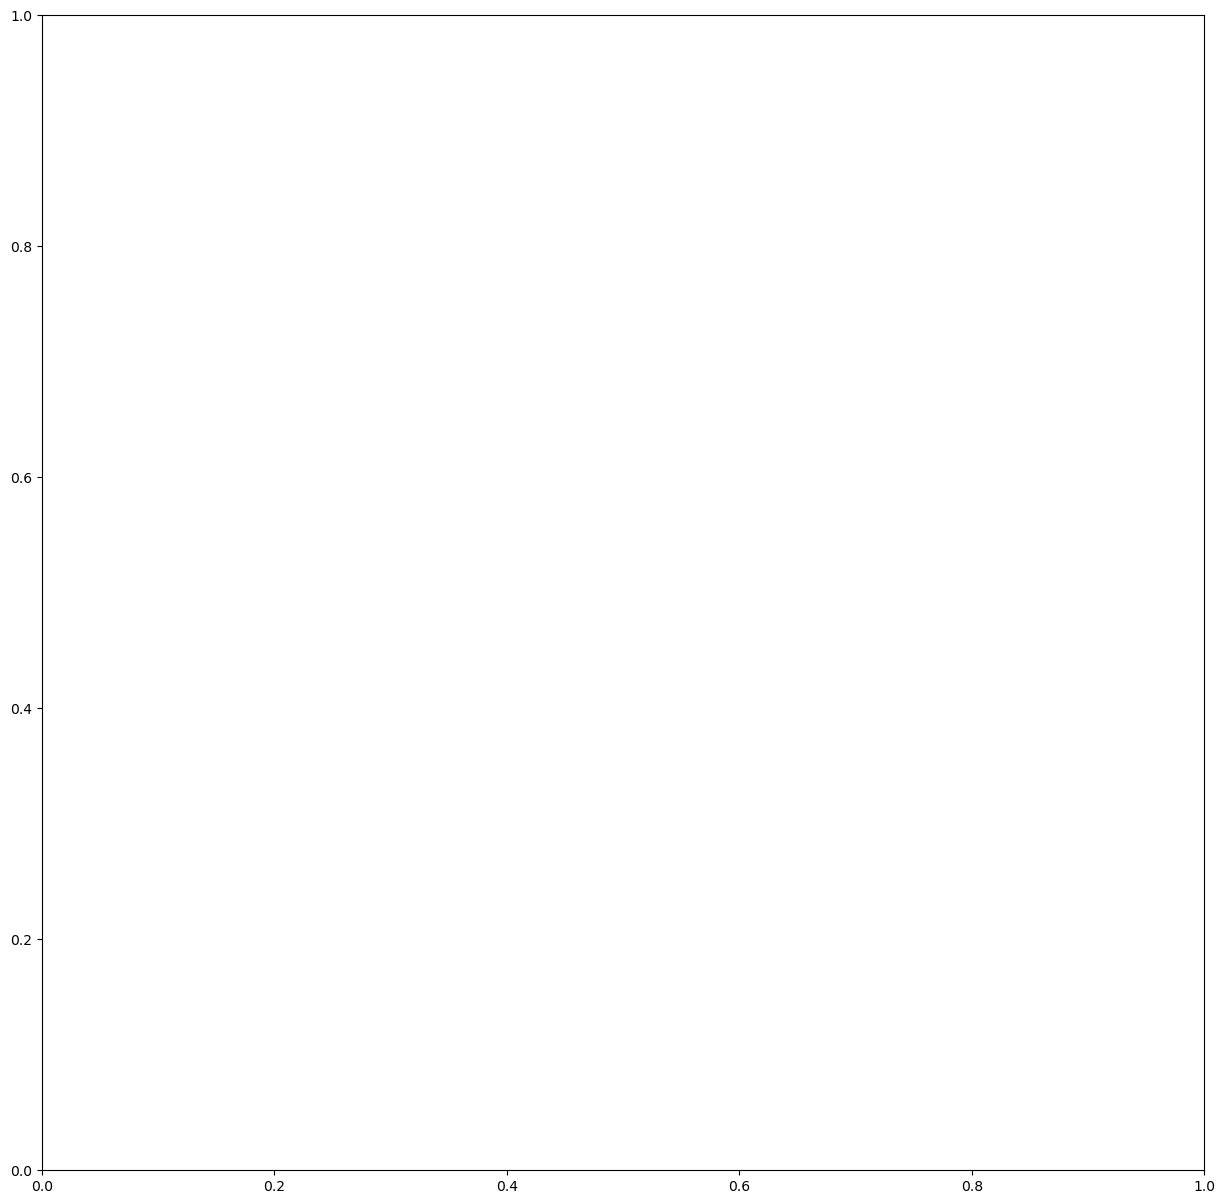

In [38]:
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

# Assuming `street_map` is a GeoDataFrame representing the street map
# Ensure `street_map` has the correct CRS (EPSG:4326 - WGS84)
street_map.crs = "EPSG:4326"

# Ensure 'Latitude' and 'Longitude' columns in df are numeric
df['Latitude'] = pd.to_numeric(df['Latitude'], errors='coerce')
df['Longitude'] = pd.to_numeric(df['Longitude'], errors='coerce')

# Drop rows with NaN values in 'Latitude' or 'Longitude'
df = df.dropna(subset=['Latitude', 'Longitude'])

# Create geometry column
geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]
geo_df = gpd.GeoDataFrame(df, geometry=geometry, crs="EPSG:4326")

# Plotting
fig, ax = plt.subplots(figsize=(15, 15))

# Plot street map
street_map.plot(ax=ax, alpha=0.7, color='grey')

# Plot points from geo_df
geo_df.plot(ax=ax, column="Name", markersize=50, legend=True, alpha=0.5, cmap='viridis')

# Set limits based on the bounds of geo_df
minx, miny, maxx, maxy = geo_df.total_bounds
ax.set_xlim(minx - 0.01, maxx + 0.01)  # Adjusted slightly to provide padding
ax.set_ylim(miny - 0.01, maxy + 0.01)  # Adjusted slightly to provide padding

# Set aspect ratio to be equal or auto
ax.set_aspect('auto')  # Alternatively, try 'equal'

plt.title("London Tube Stations")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()
